In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# q1 = fashion_mnist.load_data()


In [3]:
train_images.shape # (60000, 28, 28)
train_labels.shape # (60000,)
test_images.shape  # (10000, 28, 28)
test_labels.shape  # (10000,)

(10000,)

In [4]:
df_describe = pd.DataFrame(train_labels)
df_describe.describe()

,0
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))  # image size
# model.add(tf.keras.layers.Conv2D(16,3,strides=1, activation="relu"))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(32,3,strides=1 , activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


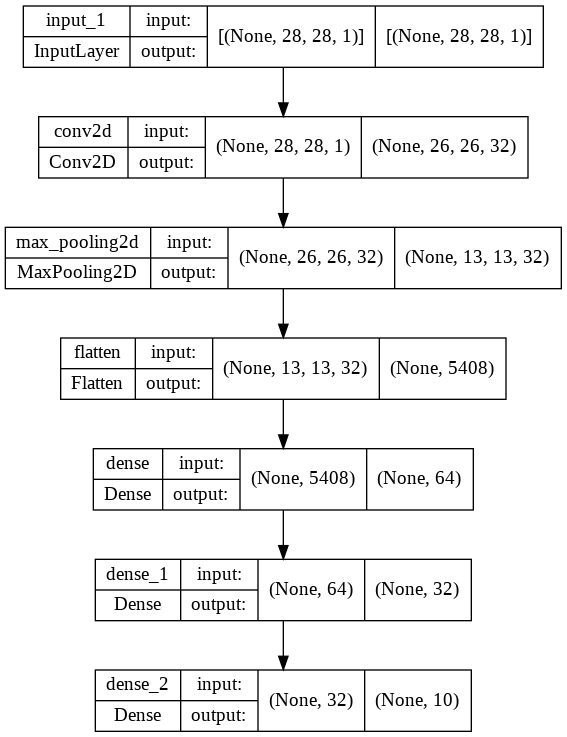

In [8]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc' , 'accuracy' ])

In [10]:
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epoch , logs=None):
    if(logs['acc'] >= ACCURACY_THRESHOLD):
      print("\n\n accuracy passed ! " , logs['acc'] , "\n\n")
      self.model.stop_training = True







In [11]:
callbacks = myCallback()

In [12]:
history = model.fit( train_images, train_labels , validation_data=(test_images ,test_labels), epochs = 50 , callbacks=[callbacks] , batch_size=800)

Epoch 1/50
75/75 [==============================] - 30s 389ms/step - loss: 0.8501 - acc: 0.7227 - accuracy: 0.7227 - val_loss: 0.5088 - val_acc: 0.8187 - val_accuracy: 0.8187
Epoch 2/50
75/75 [==============================] - 23s 303ms/step - loss: 0.4448 - acc: 0.8446 - accuracy: 0.8446 - val_loss: 0.4238 - val_acc: 0.8504 - val_accuracy: 0.8504
Epoch 3/50
75/75 [==============================] - 23s 308ms/step - loss: 0.3830 - acc: 0.8663 - accuracy: 0.8663 - val_loss: 0.3897 - val_acc: 0.8635 - val_accuracy: 0.8635
Epoch 4/50
75/75 [==============================] - 22s 298ms/step - loss: 0.3467 - acc: 0.8782 - accuracy: 0.8782 - val_loss: 0.3609 - val_acc: 0.8734 - val_accuracy: 0.8734
Epoch 5/50
75/75 [==============================] - 23s 307ms/step - loss: 0.3237 - acc: 0.8852 - accuracy: 0.8852 - val_loss: 0.3383 - val_acc: 0.8799 - val_accuracy: 0.8799
Epoch 6/50
75/75 [==============================] - 23s 304ms/step - loss: 0.3055 - acc: 0.8926 - accuracy: 0.8926 - val_loss

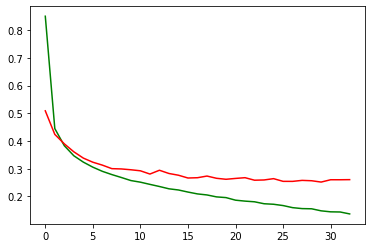

In [13]:
plt.plot(history.history['loss'] , color = 'green')
plt.plot(history.history['val_loss'] , color = 'red')

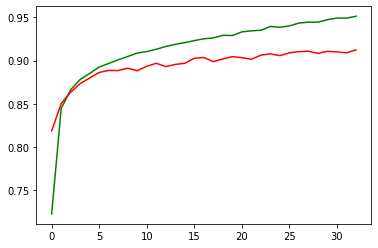

In [14]:
plt.plot(history.history['accuracy'] , color = 'green')
plt.plot(history.history['val_accuracy'] , color = 'red')

In [15]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(28,28,1)))  # image size
# model1.add(tf.keras.layers.Conv2D(16,3,strides=1, activation="relu"))
# model1.add(tf.keras.layers.MaxPool2D(pool_size=2))
model1.add(tf.keras.layers.Conv2D(32,3,strides=1 , activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(64,activation="relu"))
model1.add(tf.keras.layers.Dense(32,activation="relu"))
model1.add(tf.keras.layers.Dense(10,activation="softmax"))



model1.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['acc' , 'accuracy' ])

history1 = model1.fit( train_images, train_labels , validation_data=(test_images ,test_labels), epochs = 50 , callbacks=[callbacks] , batch_size=800)

Epoch 1/50
75/75 [==============================] - 23s 302ms/step - loss: 0.9655 - acc: 0.6743 - accuracy: 0.6743 - val_loss: 0.6077 - val_acc: 0.7688 - val_accuracy: 0.7688
Epoch 2/50
75/75 [==============================] - 23s 306ms/step - loss: 0.5306 - acc: 0.8078 - accuracy: 0.8078 - val_loss: 0.5582 - val_acc: 0.7934 - val_accuracy: 0.7934
Epoch 3/50
75/75 [==============================] - 23s 304ms/step - loss: 0.4421 - acc: 0.8411 - accuracy: 0.8411 - val_loss: 0.4304 - val_acc: 0.8429 - val_accuracy: 0.8429
Epoch 4/50
75/75 [==============================] - 23s 301ms/step - loss: 0.3937 - acc: 0.8586 - accuracy: 0.8586 - val_loss: 0.3676 - val_acc: 0.8687 - val_accuracy: 0.8687
Epoch 5/50
75/75 [==============================] - 23s 301ms/step - loss: 0.3514 - acc: 0.8740 - accuracy: 0.8740 - val_loss: 0.3917 - val_acc: 0.8589 - val_accuracy: 0.8589
Epoch 6/50
75/75 [==============================] - 22s 295ms/step - loss: 0.3244 - acc: 0.8838 - accuracy: 0.8838 - val_loss

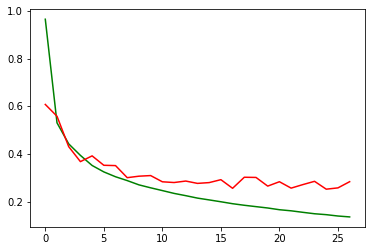

In [16]:
plt.plot(history1.history['loss'] , color = 'green')
plt.plot(history1.history['val_loss'] , color = 'red')

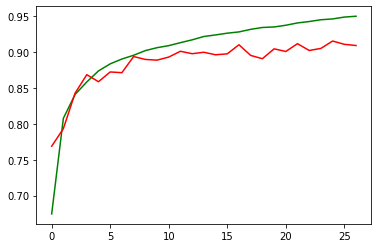

In [17]:
plt.plot(history1.history['accuracy'] , color = 'green')
plt.plot(history1.history['val_accuracy'] , color = 'red')